<a href="https://colab.research.google.com/github/velezcanizares/Series-Temporales/blob/main/series_temporales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Series Temporales
Las series temporales se usan para estudiar la relación causal entre diversas variables que cambian con el tiempo y se influyen entre sí. Desde el punto de vista probabilístico una serie temporal es una sucesión de variables aleatorias indexadas según parámetro creciente con el tiempo.

In [1]:
# importamos librerias
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import time


In [2]:
#cargamos la data completa y agregamos un subset en otro df
df = pd.read_csv("/content/base_datos_2008.csv")
df2 = df[df["Origin"].isin(["ATL","HOU","IND"])]
df = df.head(500000)

A continuación creamos un código de procesamiento de datos, para esto creamos una lista vacia ("times") y vamos a ir iterando por los index de nuestro data frame. Vamos a ir extendeindo la lista times con la función append. Va a depender de los parametros que va a tener esta lista que son Year (Esta fijado en 2008 porque sabemos que son datos de 2008), month and dayofmonth. 

In [7]:
times = []
for i in np.arange(len(df)):
  times.append(datetime.datetime(year = 2008, month = df.loc[i,"Month"], day = df.loc[i,"DayofMonth"]))

In [8]:
#Solo para verificar, mostraremos el dato de la fila 50.000 de la lista times
times[50000]

datetime.datetime(2008, 1, 18, 0, 0)

Podemos observar que, el dato 50.000 es el año 2008, mes 1, dia 18, hora y minuto (0 y 0 respectivamente), podriamos haberlo añadido, ya que contamos con esto en la base de datos pero en este caso no es necesario hacerlo. 

Luego añadimos la lista times en el data frame df con una nueva columna

In [9]:
df["Time"] = times

Ahora, se hace un grupoby en nuestra base de datos, agrupando por el tiempo sin hacer que el index sea este (as_index=False). Y vamos a aplicar la media sobre los dos retrasos que nos ofrece la base de datos, el de salida y llegada.

In [10]:
data = df.groupby(by= ["Time"],as_index=False)["DepDelay","ArrDelay"].mean()
data.head()

<ipython-input-10-f5b99edc22c5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = df.groupby(by= ["Time"],as_index=False)["DepDelay","ArrDelay"].mean()


,Time,DepDelay,ArrDelay
0,2008-01-01,20.545599,20.999240
1,2008-01-02,23.324222,22.131194
2,2008-01-03,16.697759,14.479569
3,2008-01-04,14.058087,11.851733
4,2008-01-05,18.381555,17.138031


Graficamos para verificar que tiene la estructura que deseamos.

<Axes: xlabel='Time', ylabel='DepDelay'>

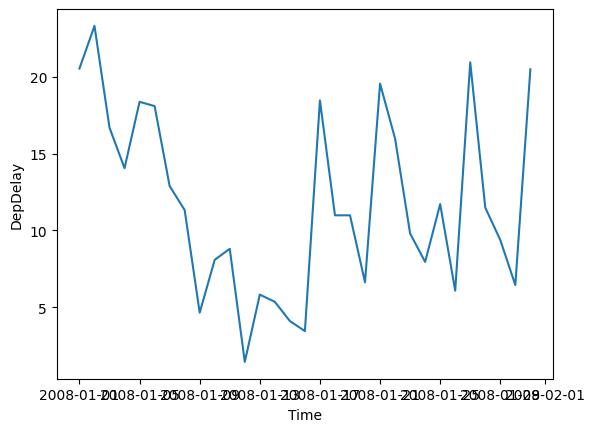

In [14]:
sns.lineplot(x="Time", y="DepDelay", data=data)

En el eje vertical tenemos el retraso de salida y en el horizontal el tiempo en el formato que deseamos.

Ahora, ¿Cómo quedaría este objeto si el parametro que fuerza el index en el groupby anterior?.

In [18]:
data = df.groupby(by="Time")[["DepDelay", "ArrDelay"]].mean()
data.head()

,DepDelay,ArrDelay
Time,,
2008-01-01,20.545599,20.999240
2008-01-02,23.324222,22.131194
2008-01-03,16.697759,14.479569
2008-01-04,14.058087,11.851733
2008-01-05,18.381555,17.138031


El graficar este objeto obtenemos un gráfico que es una serie donde podemos mostrar más de una serie temporal. Este estructura es muy práctica porque es extensible facilmente a más columnas.

<Axes: xlabel='Time'>

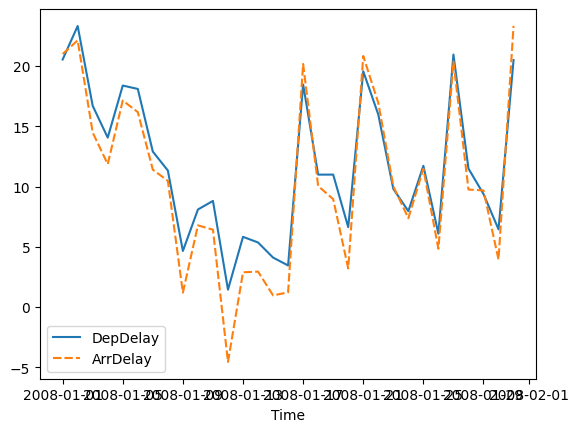

In [19]:
#graficamos para ver el objeto
sns.lineplot(data = data)

A continuación generamos la lista times para el segundo data frame que habiamos creado al principio (df2). Igual como en el caso anterior agregamos esta lista times como nueva columna ("Time") a df2.

In [23]:
times = []
for i in df2.index:
  times.append(datetime.datetime(year = 2008, month = df2.loc[i,"Month"], day = df2.loc[i,"DayofMonth"]))

df2["Time"]= times

df2.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Time
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,17.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2008-01-03
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,7.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2008-01-03
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,10.0,0.0,NaN,0.0,2.0,0.0,0.0,0.0,32.0,2008-01-03
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,10.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2008-01-03
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,...,7.0,0.0,NaN,0.0,10.0,0.0,0.0,0.0,47.0,2008-01-03


Finalmente, graficamos la serie de tiempo, donde indicamos que la variable categórica sea el origen. En el eje x tenemos el tiempo y en el eje y los retrasos. Se puede observar que el gráfico tiene un intervalo de confianza (el sombreado)

<Axes: xlabel='Time', ylabel='ArrDelay'>

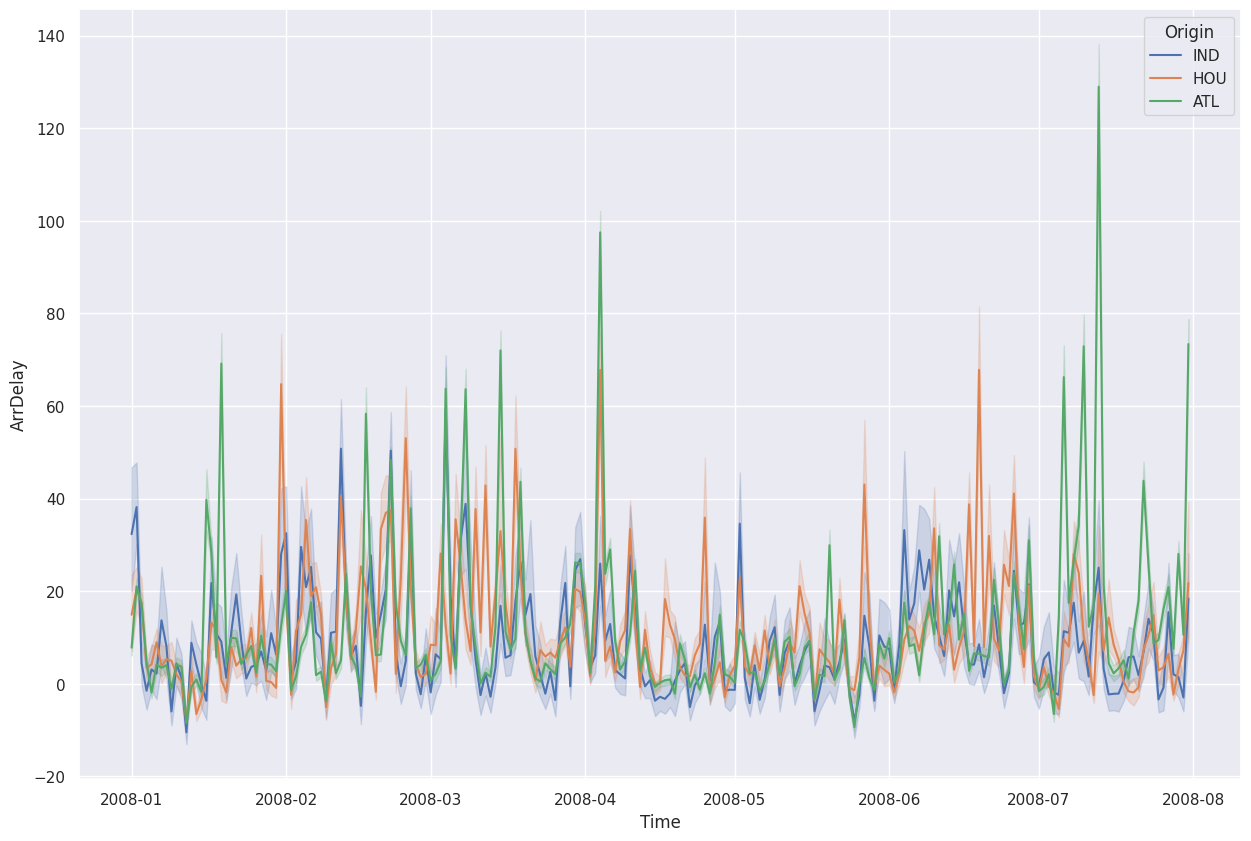

In [24]:
sns.set(rc={'figure.figsize' : (15,10)}) #ajustamos los margenes de la figura o gráfico
sns.lineplot(x= "Time", y= "ArrDelay", hue= "Origin", data=df2)